<a href="https://colab.research.google.com/github/nastipana/Business-big-data/blob/main/Best_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ### IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import KNNImputer
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

Data Exploration:

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/data/train.csv')
train_df.head()

,id,is_appartment,area,added_time,bedrooms,new_building,postcode,lat,lon,advertiser,foto_amount,is_promoted,subtype,sticker,price_drop_date,energy_value,energy_label,province,price
0,tr0,True,88.0,141725167,2.0,0,8300,51.342160,3.287791,Vastio,12.0,1,Appartement,NaN,NaN,210.0,c,West-Vlaanderen,599000.0
1,tr1,True,55.0,132223171,1.0,0,1800,50.933980,4.436390,Ring Consult,10.0,1,Appartement,NaN,NaN,92.0,a,Vlaams-Brabant,199000.0
2,tr2,False,333.0,119151262,4.0,0,3294,50.996456,5.045376,Hillewaere Heist-op-den-Berg,30.0,1,Villa,NaN,2024-06-08 23:29:39,NaN,f,Vlaams-Brabant,875000.0
3,tr3,False,517.0,137313038,5.0,0,1700,50.843364,4.274004,Living Stone Dilbeek,31.0,1,Eengezinswoning,NaN,NaN,322.0,d,Vlaams-Brabant,649000.0
4,tr4,True,99.0,137303955,3.0,0,8300,51.348180,3.276942,Colpin Heist,13.0,1,Appartement,NaN,NaN,161.0,b,West-Vlaanderen,765000.0


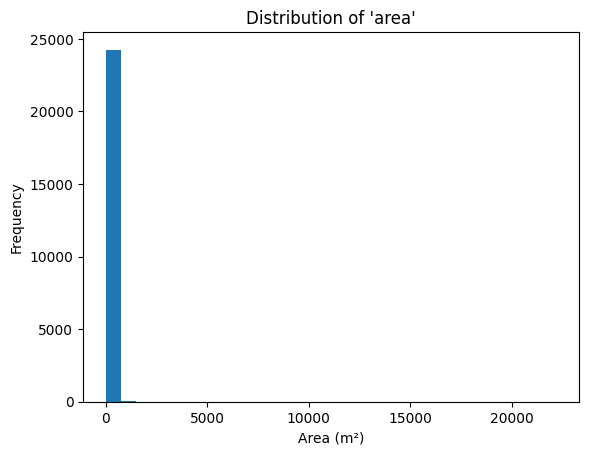

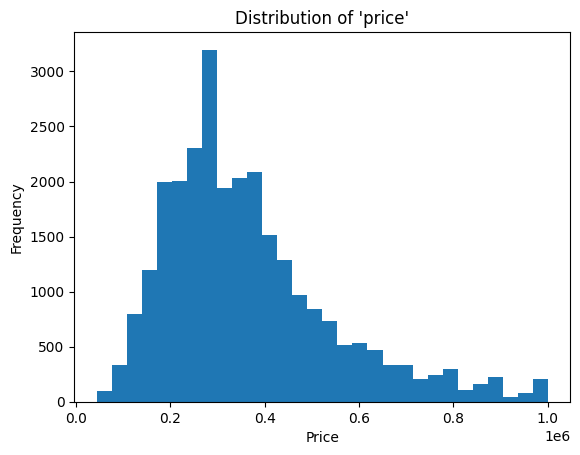

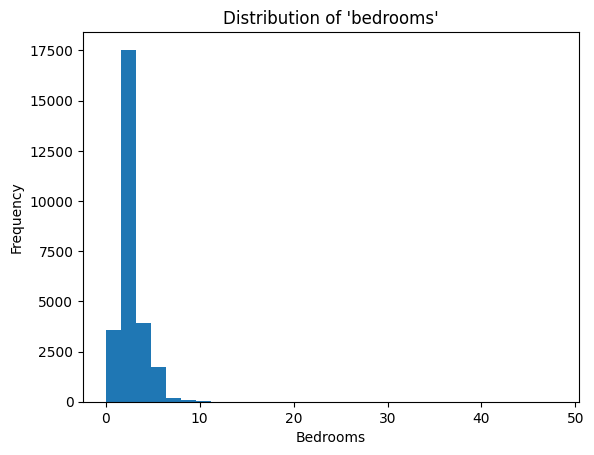

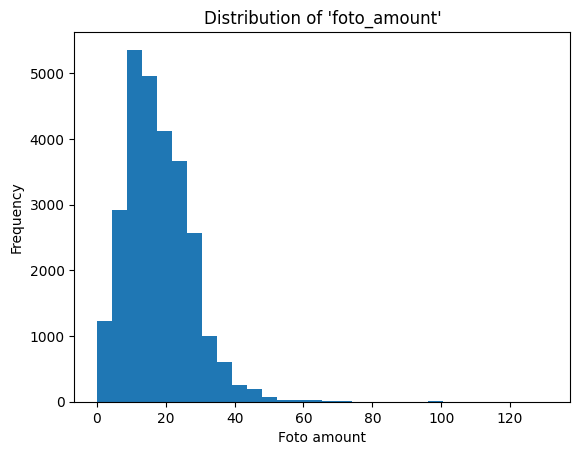

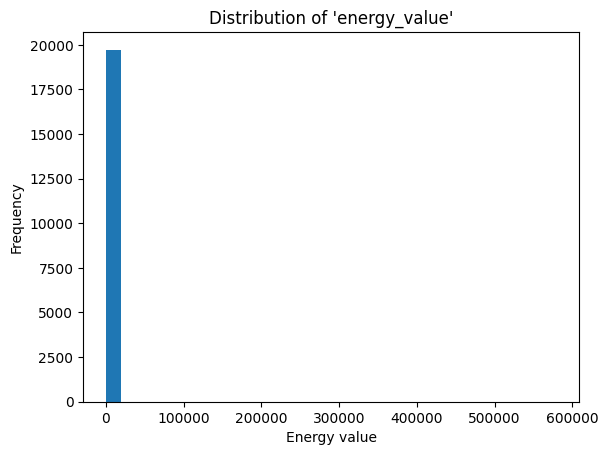

In [ ]:
# Check distributions of numerical variables
plt.hist(train_df['area'].dropna(), bins=30)
plt.title("Distribution of 'area'")
plt.xlabel("Area (m²)")
plt.ylabel("Frequency")
plt.show()

plt.hist(train_df['price'].dropna(), bins=30)
plt.title("Distribution of 'price'")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

plt.hist(train_df['bedrooms'].dropna(), bins=30)
plt.title("Distribution of 'bedrooms'")
plt.xlabel("Bedrooms")
plt.ylabel("Frequency")
plt.show()

plt.hist(train_df['foto_amount'].dropna(), bins=30)
plt.title("Distribution of 'foto_amount'")
plt.xlabel("Foto amount")
plt.ylabel("Frequency")
plt.show()

plt.hist(train_df['energy_value'].dropna(), bins=30)
plt.title("Distribution of 'energy_value'")
plt.xlabel("Energy value")
plt.ylabel("Frequency")
plt.show()

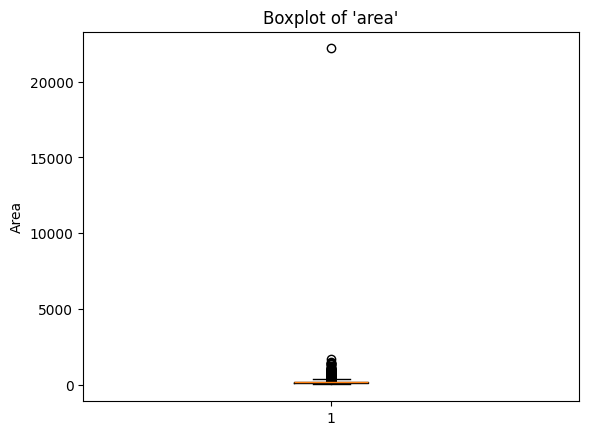

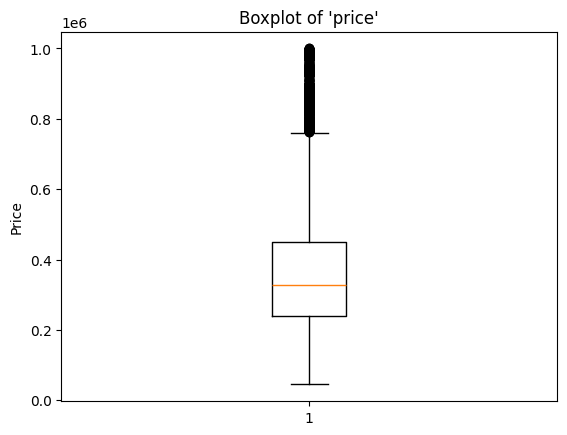

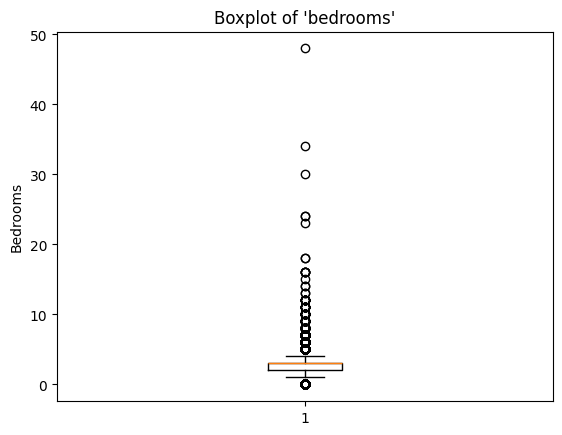

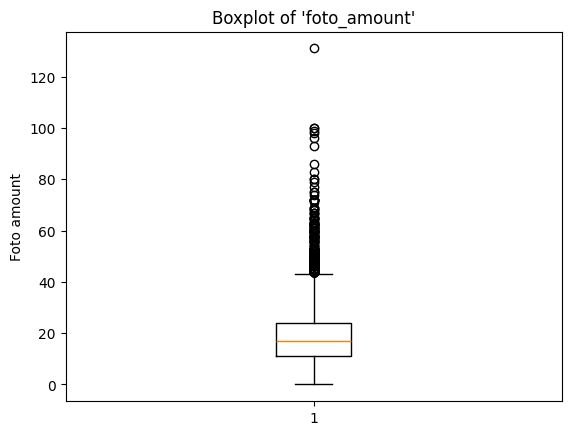

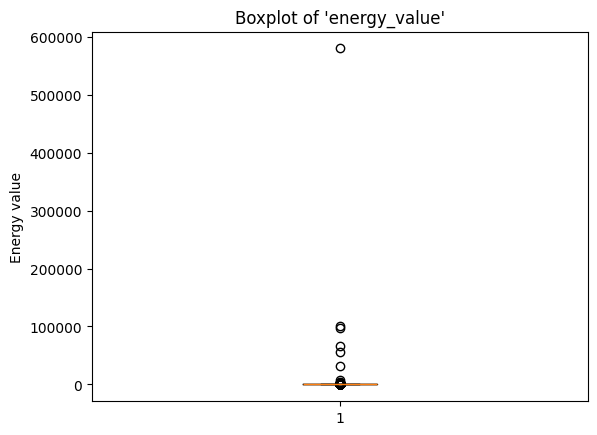

In [ ]:
# Create Boxplots of Numerical Variables
plt.boxplot(train_df['area'].dropna())
plt.title("Boxplot of 'area'")
plt.ylabel("Area")
plt.show()

plt.boxplot(train_df['price'].dropna())
plt.title("Boxplot of 'price'")
plt.ylabel("Price")
plt.show()

plt.boxplot(train_df['bedrooms'].dropna())
plt.title("Boxplot of 'bedrooms'")
plt.ylabel("Bedrooms")
plt.show()

plt.boxplot(train_df['foto_amount'].dropna())
plt.title("Boxplot of 'foto_amount'")
plt.ylabel("Foto amount")
plt.show()

plt.boxplot(train_df['energy_value'].dropna())
plt.title("Boxplot of 'energy_value'")
plt.ylabel("Energy value")
plt.show()


In [ ]:
train_df.sort_values('energy_value', ascending=False).head(10)

,id,is_appartment,area,added_time,bedrooms,new_building,postcode,lat,lon,advertiser,foto_amount,is_promoted,subtype,sticker,price_drop_date,energy_value,energy_label,province,price
18438,tr18438,False,267.0,141175258,3.0,0,3590,50.912022,5.410064,ERA Nobis (Hasselt),26.0,1,Woning,NaN,NaN,579759.0,f,Limburg,289000.0
3078,tr3078,False,217.0,134723645,3.0,0,4210,50.579647,5.059628,Easy Home Immo Marche,30.0,1,Woning,NaN,NaN,100155.0,f,Luik,239000.0
26769,tr26769,False,212.0,134936790,6.0,0,4121,50.542905,5.473577,JB immo,24.0,1,Koppelvilla,NaN,2025-01-20 15:31:03,97064.0,f,Luik,595000.0
5927,tr5927,True,110.0,138045868,2.0,0,2100,51.233530,4.465400,One Vastgoed - Deurne,11.0,1,Appartement,NaN,NaN,65965.0,f,Antwerpen,175000.0
8017,tr8017,False,70.0,125128229,2.0,0,4000,50.611477,5.539018,Agence Immobiliere Vanesse,25.0,1,Woning,NaN,2024-08-07 21:46:36,56039.0,g,Luik,105000.0
8083,tr8083,False,269.0,140648211,3.0,0,3770,50.830630,5.592364,IMMO PAULY,42.0,1,Villa,NaN,NaN,32100.0,f,Limburg,399000.0
15932,tr15932,True,120.0,141984195,3.0,0,7860,50.712203,3.822417,Office Lessen,18.0,1,Duplex,NaN,NaN,7234.0,g,Henegouwen,270000.0
7141,tr7141,True,76.0,142462408,2.0,0,7711,50.735190,3.301650,Howz - Agence immobilière,4.0,1,Duplex,NaN,NaN,4321.0,g,Henegouwen,119000.0
9386,tr9386,False,55.0,136613211,0.0,0,3730,50.821110,5.434910,Vastgoed Centrale BVBA,10.0,1,Vakantiewoning,NaN,NaN,2081.0,f,Limburg,49000.0
12028,tr12028,False,144.0,135815588,3.0,0,2470,51.281737,5.089341,Mia WILLEMSEN,30.0,1,Woning,NaN,2025-01-09 13:53:33,2061.0,f,Antwerpen,285000.0


In [ ]:
# We detected one observation with a value for area of almost 20.000 square meters.
# Since this is far away from the other values and we can assume that it is no residential
# property, we delete that row by putting the threshold to 2000.
train_df = train_df[train_df['area'] <= 2000]

# We detected 2 extremely high values for bedrooms which are corresponding to a relatively small
# area. Calculating the average amount of square meters reveals strange results (i.e. 3.21 and 5.5).
# Thus, we delete these two rows. Even though the other values are also really high, they correspond
# to large areas which is why we keep them.
train_df = train_df[train_df['bedrooms'] <= 30]

# The largest energy_values are removed since they are almost 5 times as high as the others.
train_df = train_df[train_df['energy_value'] < 20000]

In [ ]:
print(len(train_df))

17883


In [ ]:
# Definition of bounding box for Belgian coordinates
lat_min, lat_max = 49.0, 52.0
lon_min, lon_max = 2.0, 6.5

# Identify rows outside the Belgian bounding box
outliers = train_df[
    (train_df['lat'] < lat_min) | (train_df['lat'] > lat_max) |
    (train_df['lon'] < lon_min) | (train_df['lon'] > lon_max)
]

print("Outliers found:\n", outliers)

Outliers found:
             id  is_appartment   area  added_time  bedrooms  new_building  \
17577  tr17577           True   92.0   124531034       2.0             1   
23680  tr23680          False  159.0   141146208       4.0             1   

       postcode        lat        lon          advertiser  foto_amount  \
17577      3650  48.307780  15.166060  Canius Real Estate         15.0   
23680      6790  44.537936   1.676069   ERA B-Lux (Arlon)         10.0   

       is_promoted          subtype sticker      price_drop_date  \
17577            1      Appartement     NaN  2025-01-17 16:24:03   
23680            1  Eengezinswoning     NaN                  NaN   

       energy_value energy_label   province     price  
17577          47.0            a    Limburg  215000.0  
23680          73.0            a  Luxemburg  425000.0  


In [ ]:
train_df = train_df.drop(outliers.index)

In [ ]:
print(len(train_df))

17881


In [ ]:
# Include distance to city centers

# Haversine formula to calculate the distance between two points on the Earth
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    radius = 6371  # Radius of Earth in kilometers
    return radius * c  # Distance in kilometers

# Coordinates for approximate city centers (latitude, longitude)
city_centers = {
    'Brussels': (50.8503, 4.3517),
    'Antwerp': (51.2194, 4.4025),
    'Charleroi': (50.4113, 4.4447),
    'Liège': (50.6326, 5.5797),
    'Gent': (51.0543, 3.7174),
    'Brugge': (51.2093, 3.2247),
    'Leuven': (50.8794, 4.7009)
}

def min_distance_to_city(lat, lon, city_centers):
    # Compute the distance from the property to each city center and return the minimum.
    distances = [haversine(lat, lon, center[0], center[1]) for center in city_centers.values()]
    return min(distances)

# Create a new column with the minimum distance to any city center (in kilometers)
train_df['dist_to_nearest_city'] = train_df.apply(lambda row: min_distance_to_city(row['lat'], row['lon'], city_centers), axis=1)

print(train_df[['lat', 'lon', 'dist_to_nearest_city']].head())

         lat       lon  dist_to_nearest_city
0  51.342160  3.287791             15.411433
1  50.933980  4.436390             11.039219
3  50.843364  4.274004              5.509139
4  51.348180  3.276942             15.864509
6  50.903147  4.312355              6.492444


Filtered major highways: 13809
Highways CRS: EPSG:3857
Properties CRS: EPSG:3857
            id  dist_to_highway        highway
0          tr0      6484.819308       motorway
1          tr1      3614.619952       motorway
3          tr3       677.234876  motorway_link
4          tr4      7881.912566       motorway
6          tr6      1246.709507  motorway_link
...        ...              ...            ...
27062  tr27062      3597.032759       motorway
27065  tr27065      6828.404478  motorway_link
27066  tr27066      3966.413371       motorway
27068  tr27068     19050.392443       motorway
27070  tr27070      6155.787738  motorway_link

[18448 rows x 3 columns]


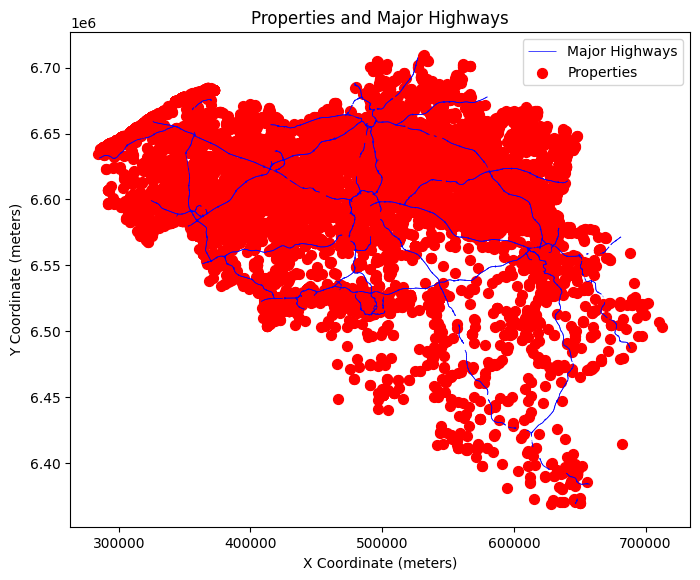

In [ ]:
# Include data on highways from OpenStreetMap contributors (https://data.humdata.org/dataset/a79592e5-b8a8-477d-a7f5-dda3e6777fc2?force_layout=desktop)

highways = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/data/hotosm_bel_roads_lines_geojson/hotosm_bel_roads_lines_geojson.geojson')
# Let's define which OSM 'highway' tags you consider "major highways"
major_highway_tags = ["motorway", "motorway_link"]

highways = highways[highways['highway'].isin(major_highway_tags)]
print("Filtered major highways:", len(highways))

# REPROJECT HIGHWAYS TO A METRIC CRS (EPSG:3857) IF NEEDED
if highways.crs is None:
    # If the file had no CRS, assume it's EPSG:4326 (WGS84 lat/lon).
    highways = highways.set_crs(epsg=4326)

if highways.crs.to_string() != 'EPSG:3857':
    highways = highways.to_crs(epsg=3857)

print("Highways CRS:", highways.crs)

# Convert to GeoDataFrame
properties_gdf = gpd.GeoDataFrame(
    train_df,
    geometry=[Point(xy) for xy in zip(train_df['lon'], train_df['lat'])],
    crs="EPSG:4326"  # if lat/lon are WGS84
)

# Reproject properties to the same metric CRS
properties_gdf = properties_gdf.to_crs(epsg=3857)
print("Properties CRS:", properties_gdf.crs)

# COMPUTE NEAREST HIGHWAY AND DISTANCE USING SPATIAL JOIN
# gpd.sjoin_nearest (GeoPandas 0.10+) can automatically compute distance
nearest = gpd.sjoin_nearest(
    properties_gdf,
    highways,
    how="left",
    distance_col="dist_to_highway"
)

# 'nearest' now contains columns from both properties and the matching highway,
# plus the distance to that highway in the 'dist_to_highway' column (meters).
print(nearest[['id', 'dist_to_highway', 'highway']])

# VISUALIZE MAJOR HIGHWAYS AND PROPERTIES
fig, ax = plt.subplots(figsize=(8, 8))
highways.plot(ax=ax, color='blue', linewidth=0.5, label='Major Highways')
properties_gdf.plot(ax=ax, color='red', markersize=50, label='Properties')
plt.title("Properties and Major Highways")
plt.xlabel("X Coordinate (meters)")
plt.ylabel("Y Coordinate (meters)")
plt.legend()
plt.show()

In [ ]:
train_df = train_df.merge(nearest[['id', 'dist_to_highway']], on='id', how='left')

In [ ]:
# -----------------------------
# 1. Load the External Data
# -----------------------------
external_file = '/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/data/export(2).csv'
median_df = pd.read_csv(external_file)

# Display original columns
print("Original external data columns:")
print(median_df.columns)

# -----------------------------
# 2. Filter for 2017 Only
# -----------------------------
median_df.rename(columns={'Provincie': 'Province'}, inplace=True)

# Keep only the rows where 'Jaar' is 2017
median_df = median_df[median_df['Jaar'] == 2017]

# Drop the 'Jaar' column, as it is no longer needed
median_df.drop(columns=['Jaar', 'Gewest', 'Arrondissement'], inplace=True)

# -----------------------------
# 3. Clean the External Data
# -----------------------------
# Remove the "Provincie" prefix from the 'Provincie' column using regex.
median_df['Province'] = median_df['Province'].str.replace(r'^Provincie\s+', '', regex=True)

# Convert "Aantal verkopen" to a numeric value.
median_df['Aantal verkopen'] = pd.to_numeric(median_df['Aantal verkopen'], errors='coerce')

# -----------------------------
# 4. Check the Cleaned Data
# -----------------------------
print("Cleaned external data for 2017 (first 5 rows):")
print(median_df.head())

train_df.rename(columns={'province': 'Province'}, inplace=True)
train_df['Province'] = train_df['Province'].astype(str).str.strip()

# If you have a column for year in df_train and you only want to merge for 2017,
# you can either filter df_train to 2017 or simply ignore the year in the merge.
# For this example, we merge only on 'Provincie'.

# -----------------------------
# 3. Merge the DataFrames (Keep all columns from df_train)
# -----------------------------
# Use a left join to keep all rows and columns from df_train.
train_df = train_df.merge(median_df, on='Province', how='left')

# -----------------------------
# 4. Check the Merged DataFrame
# -----------------------------
print("Merged DataFrame columns:")
print(train_df.columns)
print(train_df.head())





Original external data columns:
Index(['Gewest', 'Provincie', 'Arrondissement', 'Jaar', 'Aantal verkopen'], dtype='object')
Cleaned external data for 2017 (first 5 rows):
            Province  Aantal verkopen
44         Antwerpen          23779.0
90    Vlaams-Brabant          11981.0
136  West-Vlaanderen          18682.0
182  Oost-Vlaanderen          17905.0
228          Limburg           8665.0
Merged DataFrame columns:
Index(['id', 'is_appartment', 'area', 'added_time', 'bedrooms', 'new_building',
       'postcode', 'lat', 'lon', 'advertiser', 'foto_amount', 'is_promoted',
       'subtype', 'sticker', 'price_drop_date', 'energy_value', 'energy_label',
       'Province', 'price', 'dist_to_nearest_city', 'dist_to_highway',
       'Aantal verkopen_x', 'price_diff', 'Aantal verkopen_y',
       'Aantal verkopen'],
      dtype='object')
    id  is_appartment   area  added_time  bedrooms  new_building  postcode  \
0  tr0           True   88.0   141725167       2.0             0      8300   

                          area  bedrooms       lat       lon  foto_amount  \
area                  1.000000  0.644903 -0.092360  0.109871     0.438354   
bedrooms              0.644903  1.000000 -0.116420  0.093409     0.377462   
lat                  -0.092360 -0.116420  1.000000 -0.219937    -0.040788   
lon                   0.109871  0.093409 -0.219937  1.000000     0.231030   
foto_amount           0.438354  0.377462 -0.040788  0.231030     1.000000   
energy_value          0.093990  0.098086 -0.046493  0.008106     0.056406   
price                 0.558703  0.415290  0.106483  0.051537     0.365414   
dist_to_highway       0.138313  0.123958 -0.112245  0.107045     0.141996   
dist_to_nearest_city  0.129106  0.106156 -0.320183  0.090984     0.120986   
price_diff            0.570344  0.419412  0.106403  0.064555     0.389627   

                      energy_value     price  dist_to_highway  \
area                      0.093990  0.558703         0.138313   
bedrooms              

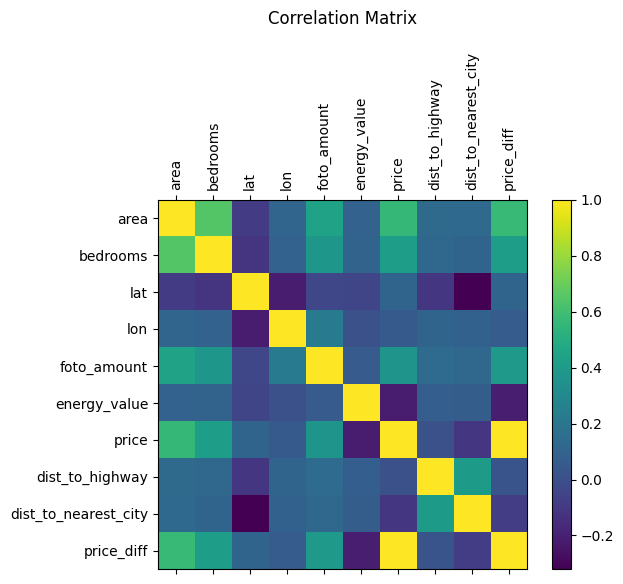

In [ ]:
# Correlation matrix
numeric_cols = ['area', 'bedrooms', 'lat', 'lon', 'foto_amount',
                'energy_value', 'price', 'dist_to_highway', 'dist_to_nearest_city', 'price_diff']

corr = train_df[numeric_cols].corr(numeric_only=True)
print(corr)

# Visualize correlation matrix
fig, ax = plt.subplots()
cax = ax.matshow(corr)
fig.colorbar(cax)
ax.set_xticks(range(len(numeric_cols)))
ax.set_yticks(range(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=90)
ax.set_yticklabels(numeric_cols)
plt.title("Correlation Matrix", pad=20)
plt.show()

Predictive Model

In [ ]:
# ### LOAD THE DATA

test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/data/test.csv")

# Drop unnecessary columns
#train_df = train_df.drop(columns=['id', 'sticker', 'price_drop_date', 'added_time'])

numeric_cols = ['area', 'lat', 'lon', 'energy_value', 'bedrooms', 'foto_amount', 'price', 'dist_to_highway', 'dist_to_nearest_city', 'price_diff']
cat_cols = ['is_appartment', 'new_building', 'advertiser', 'subtype', 'energy_label', 'Province', 'postcode']

train_num = train_df[numeric_cols]
train_cat = train_df[cat_cols]

# KNN impute numeric columns

imputer = KNNImputer(n_neighbors=5)
train_num_imputed = imputer.fit_transform(train_num)

# Convert back to a DataFrame
train_num_imputed = pd.DataFrame(train_num_imputed,
                                 columns=numeric_cols,
                                 index=train_num.index)

# Handle categorical missing
train_cat.fillna({'advertiser': 'Unknown',
                  'subtype': 'Unknown',
                  'energy_label': 'Unknown',
                  'Province': 'Unknown'},
                 inplace=True)

# Rejoin imputed data
train_df_imputed = pd.concat([train_num_imputed, train_cat], axis=1)

# Encode categorical
# A) Label Encoding
label_enc_cols = ['advertiser']
label_encoders = {}
for col in label_enc_cols:
    le = LabelEncoder()
    train_df_imputed[col] = le.fit_transform(train_df_imputed[col])
    label_encoders[col] = le

# B) One-hot encode the remaining categorical columns
to_one_hot = ['energy_label', 'Province', 'subtype']

train_df_imputed = pd.get_dummies(train_df_imputed,
                                  columns=to_one_hot,
                                  drop_first=True)

Here change the transformation type

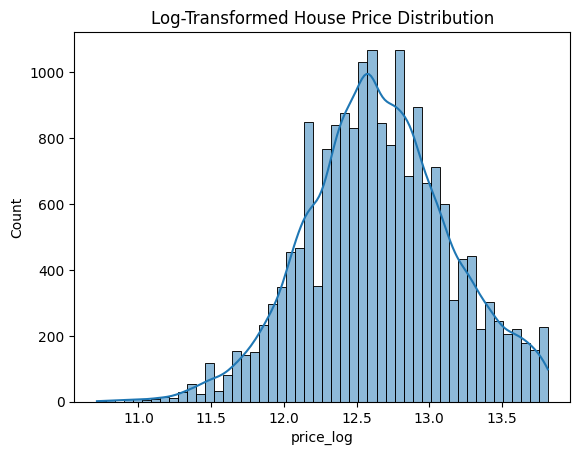

In [ ]:
# ### ADD LOG DISTANCE FEATURES FOR CITY CENTERS

# Function to calculate the log distance to city center if property is within the threshold
def assign_log_distance(row, city, city_lat, city_lon, threshold_km=15):
    distance = haversine(row['lat'], row['lon'], city_lat, city_lon)
    # If the property is within the threshold, return the log of the distance
    if distance <= threshold_km:
        return np.log(distance)  # Log-transformed distance
    else:
        return np.nan  # Return NaN if the property is outside the threshold

# Add log distance features for each city
for city, (lat, lon) in city_centers.items():
    # Log distance feature: calculate log distance for properties within 15 km of the city center
    train_df[f'{city}_log_distance'] = train_df.apply(lambda row: assign_log_distance(row, city, lat, lon), axis=1)
    test_df[f'{city}_log_distance'] = test_df.apply(lambda row: assign_log_distance(row, city, lat, lon), axis=1)

# ### VISUALIZE HOUSE PRICES (LOG TRANSFORMED)

train_df_imputed['price_log'] = np.log1p(train_df['price'])
sns.histplot(train_df_imputed['price_log'], bins=50, kde=True)
plt.title("Log-Transformed House Price Distribution")
plt.show()

In [ ]:
# ### SPLIT INTO TRAINING AND VALIDATION SETS

X = train_df_imputed.drop(columns=['price', 'price_log'])
y = train_df_imputed['price_log']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# ### RUN THE XGBOOST MODEL

# Initialize and train XGBoost model
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_valid)
y_pred_actual = np.expm1(y_pred_xgb)

# Compute MAE
mae = mean_absolute_error(np.expm1(y_valid), y_pred_actual)
print(f"Mean Absolute Error (MAE) Before Hyperparameter Optimization: {mae:.2f}")

Mean Absolute Error (MAE) Before Hyperparameter Optimization: 1272.65


In [ ]:
# ### HYPERPARAMETRIC OPTIMIZATION ~ TAKES AROUND 15 MIN

# Define hyperparameter grid
param_grid = {
    'n_estimators': [700],  # Increase trees for better generalization
    'max_depth': [9],  # Control complexity
    'learning_rate': [0.05],  # Find optimal step size
    'subsample': [0.7],  # Reduce overfitting risk
    'colsample_bytree': [0.7],  # Feature selection
    'gamma': [0],  # Reduce overfitting
}

# Initialize XGBoost model for grid search
xgb = XGBRegressor(random_state=42, tree_method="auto")

# Perform grid search
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Optimize for MAE
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    verbose=2  # Show progress
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Display best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the final model using the best parameters
best_xgb = XGBRegressor(**grid_search.best_params_, random_state=42, tree_method="auto")
best_xgb.fit(X_train, y_train)

# Predict on validation set
y_pred_best_xgb = best_xgb.predict(X_valid)

# Convert log predictions back to real prices
y_pred_best_xgb_actual = np.expm1(y_pred_best_xgb)

# Compute MAE for the optimized model
mae_best_xgb = mean_absolute_error(np.expm1(y_valid), y_pred_best_xgb_actual)
print(f"Mean Absolute Error (MAE) After Hyperparameter Optimization: {mae_best_xgb:.2f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 700, 'subsample': 0.7}
Mean Absolute Error (MAE) After Hyperparameter Optimization: 7414.39


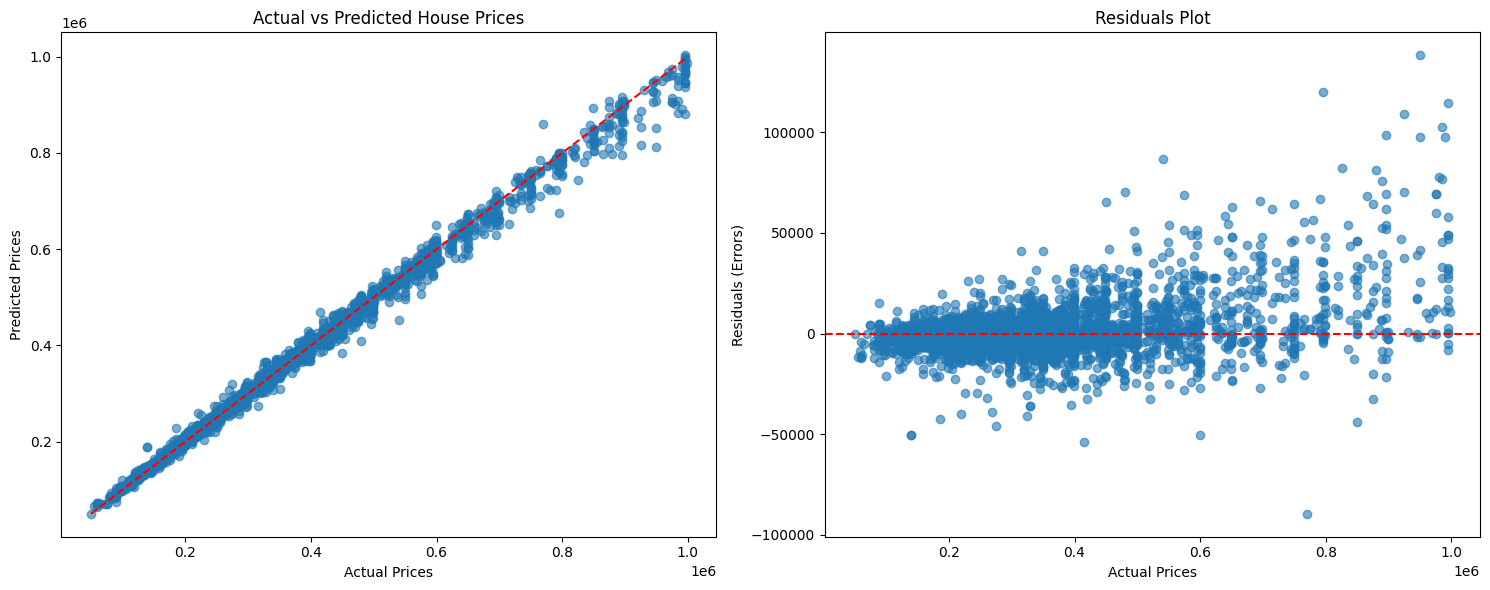

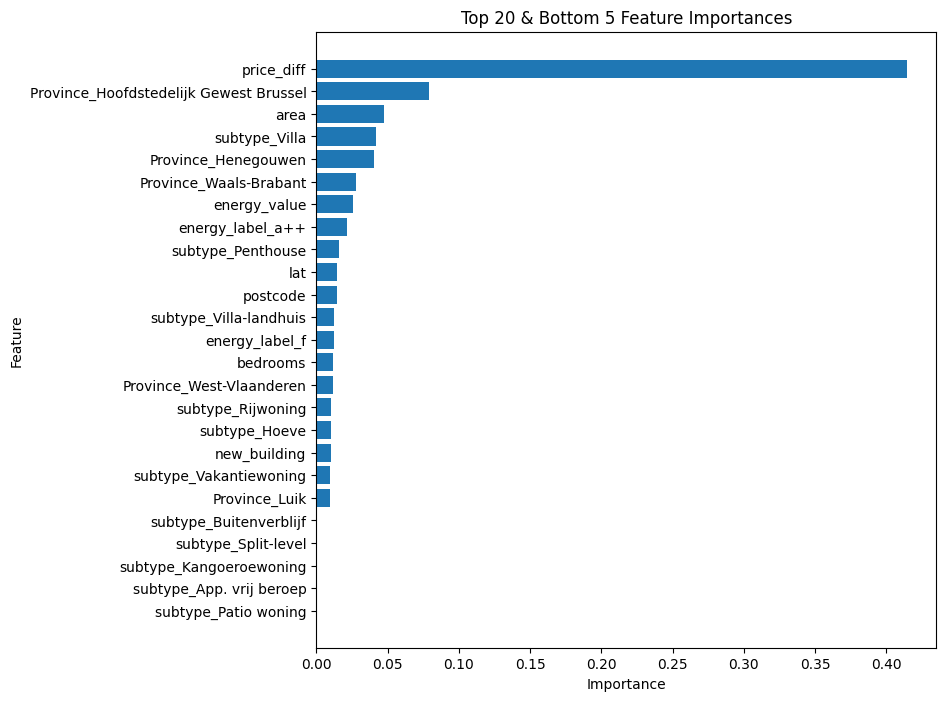

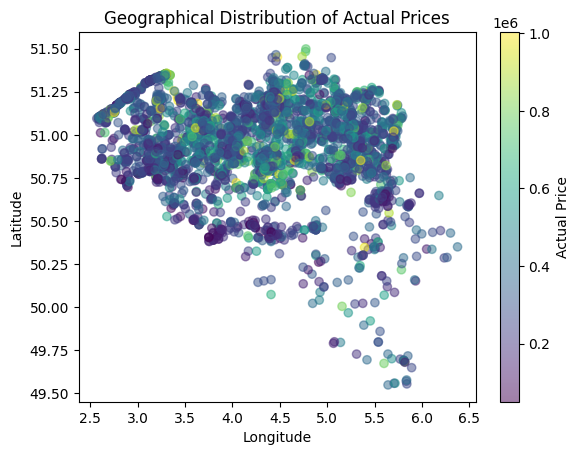

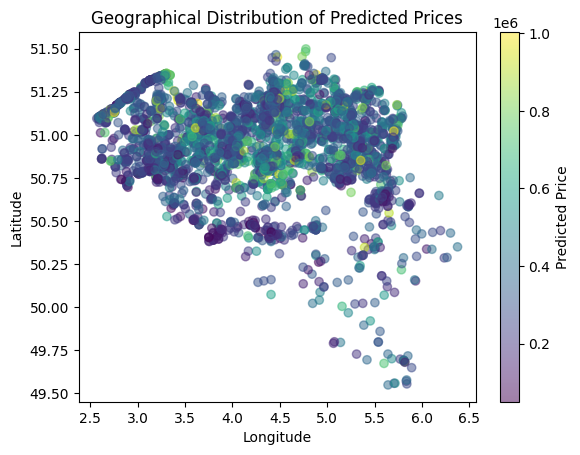

In [ ]:
# ### VISUALIZE ACTUAL VS PREDICTED PRICES

# Combined plot for Actual vs Predicted with Residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Actual vs Predicted
ax1.scatter(np.expm1(y_valid), y_pred_best_xgb_actual, alpha=0.6)
ax1.plot([min(np.expm1(y_valid)), max(np.expm1(y_valid))],
         [min(np.expm1(y_valid)), max(np.expm1(y_valid))], color='red', linestyle='--')
ax1.set_xlabel('Actual Prices')
ax1.set_ylabel('Predicted Prices')
ax1.set_title('Actual vs Predicted House Prices')

# Residuals Plot
residuals = np.expm1(y_valid) - y_pred_best_xgb_actual
ax2.scatter(np.expm1(y_valid), residuals, alpha=0.6)
ax2.axhline(0, color='red', linestyle='--')
ax2.set_xlabel('Actual Prices')
ax2.set_ylabel('Residuals (Errors)')
ax2.set_title('Residuals Plot')

plt.tight_layout()
plt.show()

# Get feature importance from the trained model
importance = best_xgb.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Sort by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select top 20 and bottom 5
top_20 = importance_df.head(20)
bottom_5 = importance_df.tail(5)

# Combine them
combined = pd.concat([top_20, bottom_5])

# Sort so the bar chart looks nice (ascending importance along y-axis)
combined = combined.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 8))
plt.barh(combined['Feature'], combined['Importance'])
plt.title("Top 20 & Bottom 5 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

### Geospatial Plots

# Suppose y_valid is in log scale; exponentiate to get actual prices:
actual_prices = np.expm1(y_valid)  # or np.exp(y_valid) if you used pure log(price)

# If y_pred_best_xgb_actual is already exponentiated, rename for clarity:
predicted_prices = y_pred_best_xgb_actual

# Determine a shared color scale (vmin, vmax) across actual & predicted
vmin = min(actual_prices.min(), predicted_prices.min())
vmax = max(actual_prices.max(), predicted_prices.max())

# Plot Actual
plt.scatter(X_valid['lon'], X_valid['lat'], c=actual_prices, alpha=0.5,
            vmin=vmin, vmax=vmax)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar()
cbar.set_label("Actual Price")
plt.title("Geographical Distribution of Actual Prices")
plt.show()

# Plot Predicted
plt.scatter(X_valid['lon'], X_valid['lat'], c=predicted_prices, alpha=0.5,
            vmin=vmin, vmax=vmax)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar()
cbar.set_label("Predicted Price")
plt.title("Geographical Distribution of Predicted Prices")
plt.show()



In [ ]:
# ### SCORE THE TEST DATA

# Handle missing values and categorical variables in the test set
test_df.fillna({
    'area': train_df['area'].median(),
    'lat': train_df['lat'].median(),
    'lon': train_df['lon'].median(),
    'energy_value': train_df['energy_value'].median(),
    'advertiser': 'Unknown',
    'subtype': 'Unknown',
    'energy_label': 'Unknown'}, inplace=True)

# Apply label encoding for categorical variables and handle unseen labels
for col in label_enc_cols:
    test_df[col] = test_df[col].apply(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

# One-hot encoding for categorical variables
test_df = pd.get_dummies(test_df, columns=['energy_label', 'province'], drop_first=True)

# Ensure the test set has the same columns as the training set
test_df = test_df.reindex(columns=X_train.columns, fill_value=0)

# Predict on the test set
test_pred_log_xgb = best_xgb.predict(test_df)
test_pred_prices_xgb = np.expm1(test_pred_log_xgb)

# Calculate the prediction interval (lower and upper bounds) for each prediction
error_std = np.std(y_pred_best_xgb_actual - np.expm1(y_valid))  # Using the standard deviation of residuals
interval_width = 1.28 * error_std  # Approximate z-score for 80% confidence interval

# Calculate Lower and Upper bounds for the predictions
lower_bound_final = np.maximum(0, test_pred_prices_xgb - interval_width)
upper_bound_final = test_pred_prices_xgb + interval_width

# Ensure that the lower bounds are less than the upper bounds
assert np.all(lower_bound_final <= upper_bound_final), "Lower bound is greater than upper bound!"

# Prepare the submission DataFrame with the required columns: ID, LOWER, UPPER, and PRED
submission_xgb = pd.DataFrame({
    'ID': test_df.index,  # Ensure this matches the ID format in the test set
    'LOWER': lower_bound_final,
    'UPPER': upper_bound_final,
    'PRED': test_pred_prices_xgb
})

# Save the results as a comma-separated CSV without header
submission_xgb.to_csv("/content/drive/MyDrive/Colab Notebooks/Advanced Analytics/data/house_final.csv", index=False, header=False, sep=',')
print("Submission file saved as 'house_final.csv'")





Submission file saved as 'house_final.csv'


In [ ]:
# ### WINKLER SCORE CALCULATION

# Compute Winkler score using actual and predicted values for the validation set
error_std_valid = np.std(y_pred_best_xgb_actual - np.expm1(y_valid))  # Using the validation set residuals
interval_width_valid = 1.28 * error_std_valid  # 80% confidence interval width

# Define lower and upper bounds for the validation set
lower_bound_valid = y_pred_best_xgb_actual - interval_width_valid
upper_bound_valid = y_pred_best_xgb_actual + interval_width_valid

# Ensure lower bounds are valid (no negative prices)
lower_bound_valid = np.maximum(0, lower_bound_valid)

# Compute Winkler penalty
penalty_valid = 2 / 0.20 * (np.maximum(0, lower_bound_valid - np.expm1(y_valid)) +
                           np.maximum(0, np.expm1(y_valid) - upper_bound_valid))

# Compute final Winkler Score
winkler_score_final = np.mean(upper_bound_valid - lower_bound_valid + penalty_valid)
print(f"Winkler Score (Final Model): {winkler_score_final:.2f}")

# ### Score = 359967.5
# ### Secondary Score = 62629.96

Winkler Score (Final Model): 49857.41
